In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fd58b56c8913891075200795b02f3ed3


In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portland
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | santos dumont
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | sangar
Processing Record 8 of Set 1 | berlevag
Processing Record 9 of Set 1 | beloha
Processing Record 10 of Set 1 | rawson
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | van buren
Processing Record 15 of Set 1 | brae
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | salalah
Processing Record 18 of Set 1 | tautira
Processing Record 19 of Set 1 | mandalgovi
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | lopandino
Processing Record 22 of Set 1 | husavik
Processing Record 23 of Set 1 | sas

Processing Record 43 of Set 4 | idil
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | lodwar
Processing Record 46 of Set 4 | chaohu
Processing Record 47 of Set 4 | buriti bravo
Processing Record 48 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 49 of Set 4 | langxiang
Processing Record 50 of Set 4 | kurayoshi
Processing Record 1 of Set 5 | tupik
Processing Record 2 of Set 5 | xiaoweizhai
Processing Record 3 of Set 5 | angostura
Processing Record 4 of Set 5 | talara
Processing Record 5 of Set 5 | mendahara
City not found. Skipping...
Processing Record 6 of Set 5 | reconquista
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | dakar
Processing Record 9 of Set 5 | bac lieu
Processing Record 10 of Set 5 | saint-philippe
Processing Record 11 of Set 5 | amurrio
Processing Record 12 of Set 5 | hay river
Processing Record 13 of Set 5 | barrow
Processing Record 14 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 15 of Se

Processing Record 31 of Set 8 | tucuman
Processing Record 32 of Set 8 | talnakh
Processing Record 33 of Set 8 | ahuimanu
Processing Record 34 of Set 8 | sartell
Processing Record 35 of Set 8 | de pinte
Processing Record 36 of Set 8 | nhulunbuy
Processing Record 37 of Set 8 | teeli
Processing Record 38 of Set 8 | mukhen
Processing Record 39 of Set 8 | port-gentil
Processing Record 40 of Set 8 | hirado
Processing Record 41 of Set 8 | margate
Processing Record 42 of Set 8 | krutikha
Processing Record 43 of Set 8 | bosaso
Processing Record 44 of Set 8 | ibra
Processing Record 45 of Set 8 | mporokoso
Processing Record 46 of Set 8 | hervey bay
Processing Record 47 of Set 8 | newton
Processing Record 48 of Set 8 | cabo san lucas
Processing Record 49 of Set 8 | kattivakkam
Processing Record 50 of Set 8 | ribeirao do pinhal
City not found. Skipping...
Processing Record 1 of Set 9 | quatre cocos
Processing Record 2 of Set 9 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 9 | amd

Processing Record 18 of Set 12 | mwinilunga
Processing Record 19 of Set 12 | gat
Processing Record 20 of Set 12 | oudtshoorn
Processing Record 21 of Set 12 | kavaratti
Processing Record 22 of Set 12 | hanna
Processing Record 23 of Set 12 | guider
Processing Record 24 of Set 12 | obernai
Processing Record 25 of Set 12 | buala
Processing Record 26 of Set 12 | tripoli
Processing Record 27 of Set 12 | thunder bay
Processing Record 28 of Set 12 | marcona
City not found. Skipping...
Processing Record 29 of Set 12 | aksarka
Processing Record 30 of Set 12 | tawkar
City not found. Skipping...
Processing Record 31 of Set 12 | dolhasca
Processing Record 32 of Set 12 | anjozorobe
Processing Record 33 of Set 12 | numaligarh
Processing Record 34 of Set 12 | omboue
Processing Record 35 of Set 12 | teguise
Processing Record 36 of Set 12 | bestobe
Processing Record 37 of Set 12 | tiznit
Processing Record 38 of Set 12 | rabaul
Processing Record 39 of Set 12 | moree
Processing Record 40 of Set 12 | valle

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Portland,45.5234,-122.6762,68.29,41,97,8.99,US,2022-04-06 23:56:51
1,Lebu,-37.6167,-73.6500,56.59,91,87,5.10,CL,2022-04-07 00:00:20
2,Santos Dumont,-21.4567,-43.5525,65.66,98,64,3.85,BR,2022-04-07 00:00:20
3,Mataura,-46.1927,168.8643,53.58,47,84,4.12,NZ,2022-04-07 00:00:21
4,Vaini,-21.2000,-175.2000,81.10,77,100,12.57,TO,2022-04-07 00:00:22
5,Sangar,63.9242,127.4739,0.66,96,100,4.14,RU,2022-04-07 00:00:22
6,Berlevag,70.8578,29.0864,31.80,92,100,23.17,NO,2022-04-07 00:00:23
7,Beloha,-25.1667,45.0500,72.46,92,26,1.45,MG,2022-04-07 00:00:23
8,Rawson,-43.3002,-65.1023,56.46,76,57,16.26,AR,2022-04-07 00:00:24
9,Albany,42.6001,-73.9662,51.89,73,100,3.00,US,2022-04-07 00:00:24


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Portland,US,2022-04-06 23:56:51,45.5234,-122.6762,68.29,41,97,8.99
1,Lebu,CL,2022-04-07 00:00:20,-37.6167,-73.6500,56.59,91,87,5.10
2,Santos Dumont,BR,2022-04-07 00:00:20,-21.4567,-43.5525,65.66,98,64,3.85
3,Mataura,NZ,2022-04-07 00:00:21,-46.1927,168.8643,53.58,47,84,4.12
4,Vaini,TO,2022-04-07 00:00:22,-21.2000,-175.2000,81.10,77,100,12.57
5,Sangar,RU,2022-04-07 00:00:22,63.9242,127.4739,0.66,96,100,4.14
6,Berlevag,NO,2022-04-07 00:00:23,70.8578,29.0864,31.80,92,100,23.17
7,Beloha,MG,2022-04-07 00:00:23,-25.1667,45.0500,72.46,92,26,1.45
8,Rawson,AR,2022-04-07 00:00:24,-43.3002,-65.1023,56.46,76,57,16.26
9,Albany,US,2022-04-07 00:00:24,42.6001,-73.9662,51.89,73,100,3.00


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649290528.466461

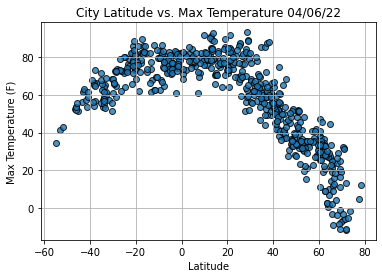

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

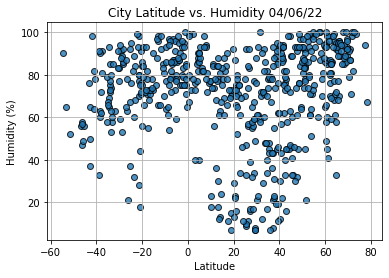

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

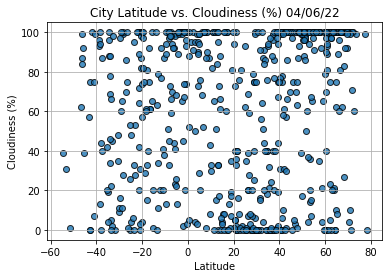

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

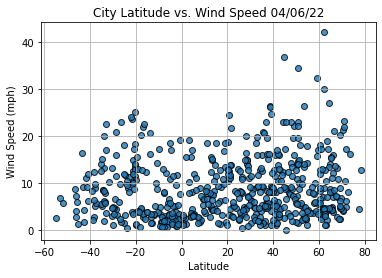

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                         Brae
Country                        GB
Date          2022-04-07 00:00:26
Lat                       60.3964
Lng                        -1.353
Max Temp                    38.37
Humidity                       58
Cloudiness                    100
Wind Speed                  18.16
Name: 13, dtype: object

In [32]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
577     True
578    False
579     True
580     True
581     True
Name: Lat, Length: 582, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Portland,US,2022-04-06 23:56:51,45.5234,-122.6762,68.29,41,97,8.99
5,Sangar,RU,2022-04-07 00:00:22,63.9242,127.4739,0.66,96,100,4.14
6,Berlevag,NO,2022-04-07 00:00:23,70.8578,29.0864,31.80,92,100,23.17
9,Albany,US,2022-04-07 00:00:24,42.6001,-73.9662,51.89,73,100,3.00
12,Van Buren,US,2022-04-07 00:00:26,35.4368,-94.3483,64.69,45,0,9.13


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

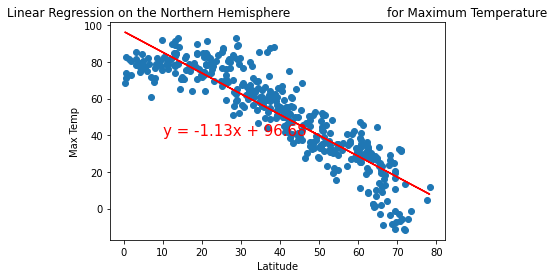

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

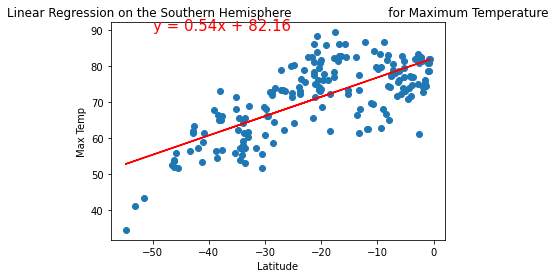

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

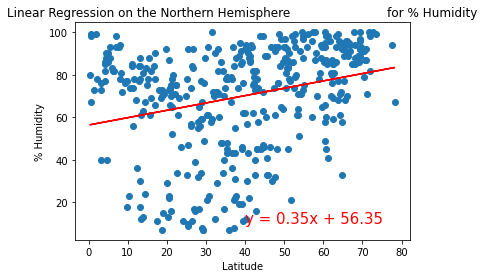

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

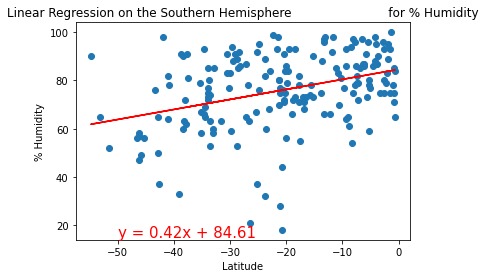

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

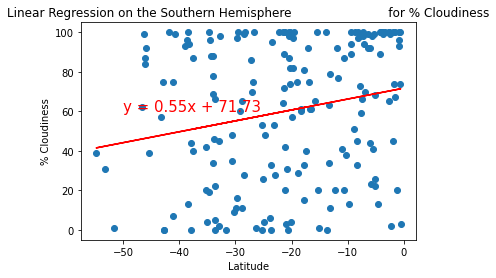

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

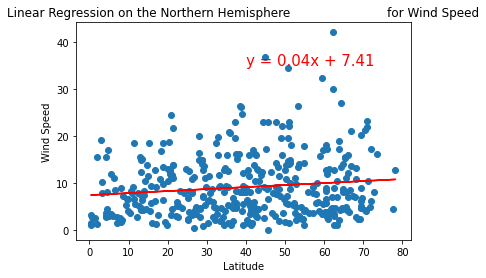

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

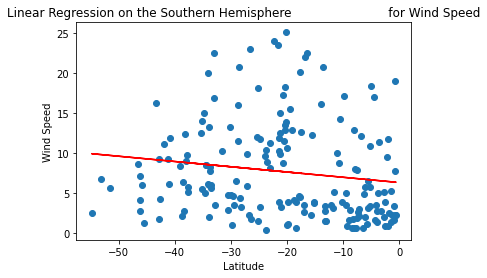

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))